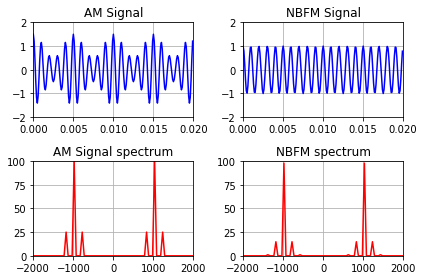

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
from scipy.fft import fft, fftshift
plt.rcParams['axes.grid'] = True

# carrier frequency (Hz) and  magnitude
fc=1000 
Ac=1  
# message frequency (Hz) and magnitude
fm=200 
Am=0.5   
# modulation parameter
kf=120 
beta=kf*Am/fm

# generage single tone message signal

sampling_period=0.0001
t=np.arange(0, 0.02, sampling_period)     # time with sampling at 10KHz

mt=Am*np.cos(2*pi*fm*t)   # message signal
sam=Ac*(1+mt)*np.cos(2*pi*fc*t)   # AM signal
sfm=Ac*np.cos(2*pi*fc*t+beta*np.sin(2*pi*fm*t))       # FM signal


fig=plt.figure()

ax1 = fig.add_subplot(221) #φτιάχνει το πλαίσιο για το διάγραμμα στο figure
ax2 = fig.add_subplot(222)

ax1.plot(t, sam, color='blue') #εισάγει την συνάρτηση στο πλέγμα
ax2.plot(t, sfm, 'blue')

ax1.title.set_text('AM Signal') #βάζει τίτλο
ax2.title.set_text('NBFM Signal')

ax1.set(xlim=(0, 0.02), ylim=(-2, 2)) #βάζει όρια στο διάγραμμα
ax2.set(xlim=(0, 0.02), ylim=(-2, 2))

#spectrum
w=np.linspace (-5000, 5000,len(t))

Fam=abs(fftshift(fft(sam)));     # spectrum of AM signal
Ffm=abs(fftshift(fft(sfm)));     # spectrum of FM signal

ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax3.plot(w, Fam, color='red')
ax4.plot(w, Ffm, 'red')

ax3.title.set_text('AM Signal spectrum') #βάζει τίτλο
ax4.title.set_text('NBFM spectrum')

ax3.set(xlim=(-2000, 2000), ylim=(min(Fam), max(Fam))) #βάζει όρια στο διάγραμμα
ax4.set(xlim=(-2000, 2000), ylim=(min(Fam), max(Fam)))

plt.tight_layout()
plt.show()